<a href="https://colab.research.google.com/github/Chamara-g/datastorm-v1-0/blob/master/datastorm_preprocess_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**sale_details_by_category**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ds_path = 'drive/My Drive/Colab Notebooks/Data Storm 1.0 - Final Round /Data Set/'
ds_write_path = 'drive/My Drive/Colab Notebooks/datastorm/processed/'

In [0]:
import numpy as np
import pandas as pd

read customer data

In [0]:
customer_data = pd.read_csv(ds_path + "customer_data .csv", index_col=0)

In [0]:
customer_data.gender.replace(['male', 'female'], [1, 0], inplace=True)
customer_data['gender'] =  customer_data['gender'].fillna(2)
customer_data['birth_year'] =  customer_data['birth_year'].fillna(0)

In [0]:
df_category = pd.read_csv( ds_write_path + 'sale_details_by_category.csv' )

In [0]:
df_category =  df_category.fillna(0)

df_category = customer_data.merge(df_category, left_on='customer_id', right_on='customer_id')
df_category.head()

,customer_id,gender,birth_year,2017_1_B117,2017_1_B115,2017_1_B112,2017_1_B120,2017_1_B118,2017_1_B110,2017_1_B111,2017_1_B106,2017_1_B124,2017_1_B109,2017_1_B114,2017_1_B116,2017_1_B123,2017_1_B121,2017_1_B108,2017_1_B107,2017_1_B113,2017_1_B119,2017_1_B122,2017_1_B125,2017_2_B117,2017_2_B115,2017_2_B112,2017_2_B120,2017_2_B118,2017_2_B110,2017_2_B111,2017_2_B106,2017_2_B124,2017_2_B109,2017_2_B114,2017_2_B116,2017_2_B123,2017_2_B121,2017_2_B108,2017_2_B107,2017_2_B113,...,2019_11_B117,2019_11_B115,2019_11_B112,2019_11_B120,2019_11_B118,2019_11_B110,2019_11_B111,2019_11_B106,2019_11_B124,2019_11_B109,2019_11_B114,2019_11_B116,2019_11_B123,2019_11_B121,2019_11_B108,2019_11_B107,2019_11_B113,2019_11_B119,2019_11_B122,2019_11_B125,2019_12_B117,2019_12_B115,2019_12_B112,2019_12_B120,2019_12_B118,2019_12_B110,2019_12_B111,2019_12_B106,2019_12_B124,2019_12_B109,2019_12_B114,2019_12_B116,2019_12_B123,2019_12_B121,2019_12_B108,2019_12_B107,2019_12_B113,2019_12_B119,2019_12_B122,2019_12_B125
0,169212,0.0,1980.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,450.0,1102.57,0.0,691.5,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,630.0,0.00,...,0.0,164.02,481.80,292.5,420.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,540.8,0.0,0.0,0.0,0.00,0.00,723.00,1637.31,273.00,0.00,0.0,780.0,0.0,0.00,306.0,0.00,0.0,0.0,88.50,0.0,184.5,0.0,0.0,0.00,0.00
1,174861,0.0,1969.0,0.0,0.0,791.31,0.0,172.5,0.0,0.0,0.0,462.78,487.5,0.0,652.5,0.0,435.0,300.0,540.0,766.5,0.0,0.0,0.00,0.0,300.0,0.00,210.0,277.5,0.0,0.0,0.0,0.00,975.0,0.00,0.0,0.0,223.5,600.0,0.0,322.50,...,514.5,300.00,1503.84,0.0,0.0,0.0,0.00,198.0,2796.80,2001.23,3370.25,486.0,0.00,1332.0,689.58,1194.0,2110.5,0.0,782.4,386.10,1317.00,600.00,391.44,0.00,345.00,0.0,0.0,0.0,1465.38,952.5,0.00,0.0,0.0,538.50,1935.0,0.0,465.0,0.0,0.00,115.68
2,198521,1.0,1978.0,0.0,150.0,0.00,0.0,180.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,81.0,0.0,0.0,0.0,769.5,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,285.00,0.00,0.0,270.0,0.0,0.00,0.0,202.17,0.00,187.50,0.0,632.82,525.0,840.00,0.0,225.0,0.0,0.0,231.48,630.00,0.00,114.21,243.00,559.65,546.0,0.0,0.0,705.27,0.0,218.13,0.0,0.0,472.50,82.5,0.0,1108.5,0.0,1035.99,527.15
3,206454,1.0,1965.0,480.0,150.0,0.00,0.0,225.0,352.5,0.0,330.0,380.84,495.0,0.0,0.0,0.0,0.0,6195.0,0.0,75.0,0.0,0.0,876.24,408.0,435.0,458.64,555.0,897.0,292.5,0.0,330.0,480.15,630.0,390.28,0.0,0.0,0.0,1327.5,0.0,74.25,...,0.0,674.70,2078.18,280.5,0.0,0.0,599.47,435.0,1290.75,0.00,1684.01,60.0,0.00,0.0,592.50,0.0,82.5,0.0,0.0,429.90,444.45,194.88,1152.41,284.53,254.58,0.0,915.0,0.0,1744.59,0.0,184.22,60.0,0.0,920.09,1162.5,0.0,0.0,0.0,0.00,186.54
4,218494,1.0,1959.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,300.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00


In [0]:
df_category.isnull().sum()

customer_id     0
gender          0
birth_year      0
2017_1_B117     0
2017_1_B115     0
               ..
2019_12_B107    0
2019_12_B113    0
2019_12_B119    0
2019_12_B122    0
2019_12_B125    0
Length: 723, dtype: int64

In [0]:
df_category['gender'] = df_category.gender.astype(int)
df_category.head()

,customer_id,gender,birth_year,2017_1_B117,2017_1_B115,2017_1_B112,2017_1_B120,2017_1_B118,2017_1_B110,2017_1_B111,2017_1_B106,2017_1_B124,2017_1_B109,2017_1_B114,2017_1_B116,2017_1_B123,2017_1_B121,2017_1_B108,2017_1_B107,2017_1_B113,2017_1_B119,2017_1_B122,2017_1_B125,2017_2_B117,2017_2_B115,2017_2_B112,2017_2_B120,2017_2_B118,2017_2_B110,2017_2_B111,2017_2_B106,2017_2_B124,2017_2_B109,2017_2_B114,2017_2_B116,2017_2_B123,2017_2_B121,2017_2_B108,2017_2_B107,2017_2_B113,...,2019_11_B117,2019_11_B115,2019_11_B112,2019_11_B120,2019_11_B118,2019_11_B110,2019_11_B111,2019_11_B106,2019_11_B124,2019_11_B109,2019_11_B114,2019_11_B116,2019_11_B123,2019_11_B121,2019_11_B108,2019_11_B107,2019_11_B113,2019_11_B119,2019_11_B122,2019_11_B125,2019_12_B117,2019_12_B115,2019_12_B112,2019_12_B120,2019_12_B118,2019_12_B110,2019_12_B111,2019_12_B106,2019_12_B124,2019_12_B109,2019_12_B114,2019_12_B116,2019_12_B123,2019_12_B121,2019_12_B108,2019_12_B107,2019_12_B113,2019_12_B119,2019_12_B122,2019_12_B125
0,169212,0,1980.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,450.0,1102.57,0.0,691.5,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,630.0,0.00,...,0.0,164.02,481.80,292.5,420.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,540.8,0.0,0.0,0.0,0.00,0.00,723.00,1637.31,273.00,0.00,0.0,780.0,0.0,0.00,306.0,0.00,0.0,0.0,88.50,0.0,184.5,0.0,0.0,0.00,0.00
1,174861,0,1969.0,0.0,0.0,791.31,0.0,172.5,0.0,0.0,0.0,462.78,487.5,0.0,652.5,0.0,435.0,300.0,540.0,766.5,0.0,0.0,0.00,0.0,300.0,0.00,210.0,277.5,0.0,0.0,0.0,0.00,975.0,0.00,0.0,0.0,223.5,600.0,0.0,322.50,...,514.5,300.00,1503.84,0.0,0.0,0.0,0.00,198.0,2796.80,2001.23,3370.25,486.0,0.00,1332.0,689.58,1194.0,2110.5,0.0,782.4,386.10,1317.00,600.00,391.44,0.00,345.00,0.0,0.0,0.0,1465.38,952.5,0.00,0.0,0.0,538.50,1935.0,0.0,465.0,0.0,0.00,115.68
2,198521,1,1978.0,0.0,150.0,0.00,0.0,180.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,81.0,0.0,0.0,0.0,769.5,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,285.00,0.00,0.0,270.0,0.0,0.00,0.0,202.17,0.00,187.50,0.0,632.82,525.0,840.00,0.0,225.0,0.0,0.0,231.48,630.00,0.00,114.21,243.00,559.65,546.0,0.0,0.0,705.27,0.0,218.13,0.0,0.0,472.50,82.5,0.0,1108.5,0.0,1035.99,527.15
3,206454,1,1965.0,480.0,150.0,0.00,0.0,225.0,352.5,0.0,330.0,380.84,495.0,0.0,0.0,0.0,0.0,6195.0,0.0,75.0,0.0,0.0,876.24,408.0,435.0,458.64,555.0,897.0,292.5,0.0,330.0,480.15,630.0,390.28,0.0,0.0,0.0,1327.5,0.0,74.25,...,0.0,674.70,2078.18,280.5,0.0,0.0,599.47,435.0,1290.75,0.00,1684.01,60.0,0.00,0.0,592.50,0.0,82.5,0.0,0.0,429.90,444.45,194.88,1152.41,284.53,254.58,0.0,915.0,0.0,1744.59,0.0,184.22,60.0,0.0,920.09,1162.5,0.0,0.0,0.0,0.00,186.54
4,218494,1,1959.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,300.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00


**sales_summary dataset**

In [0]:
df_sales_summary = pd.read_csv( ds_write_path + 'df_sales_summary_new.csv' , index_col=0)

In [0]:
df_sales_summary.head()

,2017_1_weekend_amount_spent,2017_1_Num_of_weekend_visits,2017_1_total_amount_spent,2017_1_total_num_of_visits,2017_2_weekend_amount_spent,2017_2_Num_of_weekend_visits,2017_2_total_amount_spent,2017_2_total_num_of_visits,2017_3_weekend_amount_spent,2017_3_Num_of_weekend_visits,2017_3_total_amount_spent,2017_3_total_num_of_visits,2017_4_weekend_amount_spent,2017_4_Num_of_weekend_visits,2017_4_total_amount_spent,2017_4_total_num_of_visits,2017_5_weekend_amount_spent,2017_5_Num_of_weekend_visits,2017_5_total_amount_spent,2017_5_total_num_of_visits,2017_6_weekend_amount_spent,2017_6_Num_of_weekend_visits,2017_6_total_amount_spent,2017_6_total_num_of_visits,2017_7_weekend_amount_spent,2017_7_Num_of_weekend_visits,2017_7_total_amount_spent,2017_7_total_num_of_visits,2017_8_weekend_amount_spent,2017_8_Num_of_weekend_visits,2017_8_total_amount_spent,2017_8_total_num_of_visits,2017_9_weekend_amount_spent,2017_9_Num_of_weekend_visits,2017_9_total_amount_spent,2017_9_total_num_of_visits,2017_10_weekend_amount_spent,2017_10_Num_of_weekend_visits,2017_10_total_amount_spent,2017_10_total_num_of_visits,...,2019_3_weekend_amount_spent,2019_3_Num_of_weekend_visits,2019_3_total_amount_spent,2019_3_total_num_of_visits,2019_4_weekend_amount_spent,2019_4_Num_of_weekend_visits,2019_4_total_amount_spent,2019_4_total_num_of_visits,2019_5_weekend_amount_spent,2019_5_Num_of_weekend_visits,2019_5_total_amount_spent,2019_5_total_num_of_visits,2019_6_weekend_amount_spent,2019_6_Num_of_weekend_visits,2019_6_total_amount_spent,2019_6_total_num_of_visits,2019_7_weekend_amount_spent,2019_7_Num_of_weekend_visits,2019_7_total_amount_spent,2019_7_total_num_of_visits,2019_8_weekend_amount_spent,2019_8_Num_of_weekend_visits,2019_8_total_amount_spent,2019_8_total_num_of_visits,2019_9_weekend_amount_spent,2019_9_Num_of_weekend_visits,2019_9_total_amount_spent,2019_9_total_num_of_visits,2019_10_weekend_amount_spent,2019_10_Num_of_weekend_visits,2019_10_total_amount_spent,2019_10_total_num_of_visits,2019_11_weekend_amount_spent,2019_11_Num_of_weekend_visits,2019_11_total_amount_spent,2019_11_total_num_of_visits,2019_12_weekend_amount_spent,2019_12_Num_of_weekend_visits,2019_12_total_amount_spent,2019_12_total_num_of_visits
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
519123,5738.62,5.0,9220.60,9.0,3033.61,2.0,4449.61,4.0,2173.21,1.0,5319.99,4.0,8281.02,3.0,14901.27,9.0,100.0,0.0,5772.00,5.0,4529.53,4.0,5677.03,5.0,1842.57,3.0,6423.54,5.0,3479.25,1.0,7472.44,4.0,6679.2,4.0,10010.79,5.0,5081.31,2.0,13821.24,7.0,...,5302.45,4.0,6693.58,7.0,13385.67,3.0,23558.22,10.0,6878.91,2.0,16911.51,10.0,10166.29,5.0,15077.89,9.0,1859.98,1.0,6140.02,5.0,2866.60,2.0,9435.25,7.0,4204.06,4.0,6212.56,6.0,4337.20,3.0,8343.79,5.0,9818.34,5.0,12810.99,8.0,1592.50,2.0,10112.05,7.0
1181034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.00,0.0,1891.00,2.0,4810.00,2.0,8785.00,4.0,2942.50,4.0,4847.50,7.0,4081.00,2.0,9335.50,8.0,100.00,0.0,3418.00,4.0,NaN,NaN,NaN,NaN,2669.50,1.0,6833.50,3.0,NaN,NaN,NaN,NaN,100.00,0.0,1847.50,2.0,989.50,1.0,2474.50,3.0
510205,NaN,NaN,NaN,NaN,100.00,0.0,5492.50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,4300.00,1.0,NaN,NaN,NaN,NaN,1142.50,1.0,3160.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28862.26,7.0,33402.07,9.0,21662.76,3.0,23632.74,4.0,24145.68,7.0,24712.68,9.0,22557.06,4.0,40598.46,7.0,17450.35,3.0,23422.54,6.0,15290.55,4.0,28124.25,8.0,19713.63,4.0,34532.16,8.0,13487.29,3.0,13487.29,3.0,12857.98,2.0,20203.15,4.0,18190.03,4.0,28643.14,7.0
1311201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1780.15,1.0,1780.15,1.0,1932.19,1.0,3813.19,4.0,744.10,2.0,1623.10,3.0,100.00,0.0,514.00,1.0,NaN,NaN,NaN,NaN,2208.40,1.0,2208.40,1.0,100.00,0.0,1393.00,1.0,100.00,0.0,129

replace NAN with 0

In [0]:
df_sales_summary =  df_sales_summary.fillna(0)
df_sales_summary.head()

,2017_1_weekend_amount_spent,2017_1_Num_of_weekend_visits,2017_1_total_amount_spent,2017_1_total_num_of_visits,2017_2_weekend_amount_spent,2017_2_Num_of_weekend_visits,2017_2_total_amount_spent,2017_2_total_num_of_visits,2017_3_weekend_amount_spent,2017_3_Num_of_weekend_visits,2017_3_total_amount_spent,2017_3_total_num_of_visits,2017_4_weekend_amount_spent,2017_4_Num_of_weekend_visits,2017_4_total_amount_spent,2017_4_total_num_of_visits,2017_5_weekend_amount_spent,2017_5_Num_of_weekend_visits,2017_5_total_amount_spent,2017_5_total_num_of_visits,2017_6_weekend_amount_spent,2017_6_Num_of_weekend_visits,2017_6_total_amount_spent,2017_6_total_num_of_visits,2017_7_weekend_amount_spent,2017_7_Num_of_weekend_visits,2017_7_total_amount_spent,2017_7_total_num_of_visits,2017_8_weekend_amount_spent,2017_8_Num_of_weekend_visits,2017_8_total_amount_spent,2017_8_total_num_of_visits,2017_9_weekend_amount_spent,2017_9_Num_of_weekend_visits,2017_9_total_amount_spent,2017_9_total_num_of_visits,2017_10_weekend_amount_spent,2017_10_Num_of_weekend_visits,2017_10_total_amount_spent,2017_10_total_num_of_visits,...,2019_3_weekend_amount_spent,2019_3_Num_of_weekend_visits,2019_3_total_amount_spent,2019_3_total_num_of_visits,2019_4_weekend_amount_spent,2019_4_Num_of_weekend_visits,2019_4_total_amount_spent,2019_4_total_num_of_visits,2019_5_weekend_amount_spent,2019_5_Num_of_weekend_visits,2019_5_total_amount_spent,2019_5_total_num_of_visits,2019_6_weekend_amount_spent,2019_6_Num_of_weekend_visits,2019_6_total_amount_spent,2019_6_total_num_of_visits,2019_7_weekend_amount_spent,2019_7_Num_of_weekend_visits,2019_7_total_amount_spent,2019_7_total_num_of_visits,2019_8_weekend_amount_spent,2019_8_Num_of_weekend_visits,2019_8_total_amount_spent,2019_8_total_num_of_visits,2019_9_weekend_amount_spent,2019_9_Num_of_weekend_visits,2019_9_total_amount_spent,2019_9_total_num_of_visits,2019_10_weekend_amount_spent,2019_10_Num_of_weekend_visits,2019_10_total_amount_spent,2019_10_total_num_of_visits,2019_11_weekend_amount_spent,2019_11_Num_of_weekend_visits,2019_11_total_amount_spent,2019_11_total_num_of_visits,2019_12_weekend_amount_spent,2019_12_Num_of_weekend_visits,2019_12_total_amount_spent,2019_12_total_num_of_visits
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
519123,5738.62,5.0,9220.60,9.0,3033.61,2.0,4449.61,4.0,2173.21,1.0,5319.99,4.0,8281.02,3.0,14901.27,9.0,100.0,0.0,5772.00,5.0,4529.53,4.0,5677.03,5.0,1842.57,3.0,6423.54,5.0,3479.25,1.0,7472.44,4.0,6679.2,4.0,10010.79,5.0,5081.31,2.0,13821.24,7.0,...,5302.45,4.0,6693.58,7.0,13385.67,3.0,23558.22,10.0,6878.91,2.0,16911.51,10.0,10166.29,5.0,15077.89,9.0,1859.98,1.0,6140.02,5.0,2866.60,2.0,9435.25,7.0,4204.06,4.0,6212.56,6.0,4337.20,3.0,8343.79,5.0,9818.34,5.0,12810.99,8.0,1592.50,2.0,10112.05,7.0
1181034,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,100.00,0.0,1891.00,2.0,4810.00,2.0,8785.00,4.0,2942.50,4.0,4847.50,7.0,4081.00,2.0,9335.50,8.0,100.00,0.0,3418.00,4.0,0.00,0.0,0.00,0.0,2669.50,1.0,6833.50,3.0,0.00,0.0,0.00,0.0,100.00,0.0,1847.50,2.0,989.50,1.0,2474.50,3.0
510205,0.00,0.0,0.00,0.0,100.00,0.0,5492.50,1.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,100.0,0.0,4300.00,1.0,0.00,0.0,0.00,0.0,1142.50,1.0,3160.00,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,28862.26,7.0,33402.07,9.0,21662.76,3.0,23632.74,4.0,24145.68,7.0,24712.68,9.0,22557.06,4.0,40598.46,7.0,17450.35,3.0,23422.54,6.0,15290.55,4.0,28124.25,8.0,19713.63,4.0,34532.16,8.0,13487.29,3.0,13487.29,3.0,12857.98,2.0,20203.15,4.0,18190.03,4.0,28643.14,7.0
1311201,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,1780.15,1.0,1780.15,1.0,1932.19,1.0,3813.19,4.0,744.10,2.0,1623.10,3.0,100.00,0.0,514.00,1.0,0.00,0.0,0.00,0.0,2208.4

In [0]:
df_sales_summary = customer_data.merge(df_sales_summary, left_on='customer_id', right_on='customer_id')
df_sales_summary.head()

,gender,birth_year,2017_1_weekend_amount_spent,2017_1_Num_of_weekend_visits,2017_1_total_amount_spent,2017_1_total_num_of_visits,2017_2_weekend_amount_spent,2017_2_Num_of_weekend_visits,2017_2_total_amount_spent,2017_2_total_num_of_visits,2017_3_weekend_amount_spent,2017_3_Num_of_weekend_visits,2017_3_total_amount_spent,2017_3_total_num_of_visits,2017_4_weekend_amount_spent,2017_4_Num_of_weekend_visits,2017_4_total_amount_spent,2017_4_total_num_of_visits,2017_5_weekend_amount_spent,2017_5_Num_of_weekend_visits,2017_5_total_amount_spent,2017_5_total_num_of_visits,2017_6_weekend_amount_spent,2017_6_Num_of_weekend_visits,2017_6_total_amount_spent,2017_6_total_num_of_visits,2017_7_weekend_amount_spent,2017_7_Num_of_weekend_visits,2017_7_total_amount_spent,2017_7_total_num_of_visits,2017_8_weekend_amount_spent,2017_8_Num_of_weekend_visits,2017_8_total_amount_spent,2017_8_total_num_of_visits,2017_9_weekend_amount_spent,2017_9_Num_of_weekend_visits,2017_9_total_amount_spent,2017_9_total_num_of_visits,2017_10_weekend_amount_spent,2017_10_Num_of_weekend_visits,...,2019_3_weekend_amount_spent,2019_3_Num_of_weekend_visits,2019_3_total_amount_spent,2019_3_total_num_of_visits,2019_4_weekend_amount_spent,2019_4_Num_of_weekend_visits,2019_4_total_amount_spent,2019_4_total_num_of_visits,2019_5_weekend_amount_spent,2019_5_Num_of_weekend_visits,2019_5_total_amount_spent,2019_5_total_num_of_visits,2019_6_weekend_amount_spent,2019_6_Num_of_weekend_visits,2019_6_total_amount_spent,2019_6_total_num_of_visits,2019_7_weekend_amount_spent,2019_7_Num_of_weekend_visits,2019_7_total_amount_spent,2019_7_total_num_of_visits,2019_8_weekend_amount_spent,2019_8_Num_of_weekend_visits,2019_8_total_amount_spent,2019_8_total_num_of_visits,2019_9_weekend_amount_spent,2019_9_Num_of_weekend_visits,2019_9_total_amount_spent,2019_9_total_num_of_visits,2019_10_weekend_amount_spent,2019_10_Num_of_weekend_visits,2019_10_total_amount_spent,2019_10_total_num_of_visits,2019_11_weekend_amount_spent,2019_11_Num_of_weekend_visits,2019_11_total_amount_spent,2019_11_total_num_of_visits,2019_12_weekend_amount_spent,2019_12_Num_of_weekend_visits,2019_12_total_amount_spent,2019_12_total_num_of_visits
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
169212,0.0,1980.0,0.00,0.0,0.00,0.0,100.00,0.0,7895.58,3.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1960.75,1.0,1960.75,1.0,0.00,0.0,0.00,0.0,1163.50,1.0,6243.27,2.0,4082.50,1.0,4082.50,1.0,1654.00,1.0,...,3254.98,2.0,5518.48,3.0,100.00,0.0,7666.06,3.0,2965.00,1.0,11725.00,5.0,1850.50,1.0,3289.29,2.0,100.00,0.0,10144.00,5.0,1673.50,1.0,10788.04,6.0,2689.00,1.0,3503.50,2.0,3394.00,2.0,13451.40,5.0,2564.50,1.0,4102.30,3.0,3809.50,1.0,10702.63,3.0
174861,0.0,1969.0,2160.31,2.0,8731.09,6.0,100.00,0.0,6155.50,3.0,2355.25,2.0,22786.69,11.0,17331.51,5.0,39048.09,20.0,4256.71,4.0,20550.04,16.0,310.00,1.0,8436.45,11.0,12290.31,4.0,24188.53,9.0,15359.91,7.0,24099.49,16.0,1955.50,3.0,24357.36,12.0,14007.20,8.0,...,1075.00,1.0,7176.28,5.0,485.50,1.0,5927.34,6.0,100.00,0.0,24055.84,5.0,1615.00,1.0,19162.17,6.0,532.00,1.0,6664.32,5.0,1522.87,2.0,13654.42,6.0,3692.77,4.0,8590.99,7.0,988.63,1.0,11502.36,5.0,10917.70,2.0,31705.89,10.0,100.00,0.0,12929.50,4.0
198521,1.0,1978.0,361.00,1.0,1483.00,3.0,1682.50,1.0,2824.00,3.0,100.00,0.0,6085.23,3.0,100.00,0.0,761.67,3.0,1320.25,3.0,9405.04,11.0,7967.50,1.0,14253.52,8.0,4574.55,2.0,11077.32,9.0,1078.84,2.0,2675.47,5.0,936.76,2.0,5172.76,7.0,855.24,2.0,...,100.00,0.0,382.30,1.0,1750.00,1.0,5155.00,2.0,1515.69,2.0,5623.27,5.0,2024.49,2.0,8326.42,6.0,711.22,1.0,8016.45,5.0,0.00,0.0,0.00,0.0,1912.72,3.0,2705.61,5.0,2202.34,2.0,12921.95,9.0,4174.96,3.0,5674.42,4.0,4715.82,1.0,9649.65,4.0
206454,1.0,1965.0,4954.62,1.0,13716.61,7.0,3630.22,2.0,12095.13,6.0,100.00,0.0,6091.39,6.0,4301.04,2.0,15400.62,7.0,100.00,0.0,9869.29,5.0,5077.36,2.0,13098.54,6.0,5809.92,3.0,10617.06,6.0,9334.15,3.0,12020.26,6.0,100.00,0.0,7887.82,3.0,1905.25,1.0,...,9775.42,3.0,21909.18,1

In [0]:
df_sales_summary.isnull().sum()

df_sales_summary['gender'] = df_sales_summary.gender.astype(int)
df_sales_summary.to_csv(ds_write_path + 'df_sales_summary_new_null_remove.csv', encoding='utf-8', mode='w', index=True)
df_sales_summary.head()

,gender,birth_year,2017_1_weekend_amount_spent,2017_1_Num_of_weekend_visits,2017_1_total_amount_spent,2017_1_total_num_of_visits,2017_2_weekend_amount_spent,2017_2_Num_of_weekend_visits,2017_2_total_amount_spent,2017_2_total_num_of_visits,2017_3_weekend_amount_spent,2017_3_Num_of_weekend_visits,2017_3_total_amount_spent,2017_3_total_num_of_visits,2017_4_weekend_amount_spent,2017_4_Num_of_weekend_visits,2017_4_total_amount_spent,2017_4_total_num_of_visits,2017_5_weekend_amount_spent,2017_5_Num_of_weekend_visits,2017_5_total_amount_spent,2017_5_total_num_of_visits,2017_6_weekend_amount_spent,2017_6_Num_of_weekend_visits,2017_6_total_amount_spent,2017_6_total_num_of_visits,2017_7_weekend_amount_spent,2017_7_Num_of_weekend_visits,2017_7_total_amount_spent,2017_7_total_num_of_visits,2017_8_weekend_amount_spent,2017_8_Num_of_weekend_visits,2017_8_total_amount_spent,2017_8_total_num_of_visits,2017_9_weekend_amount_spent,2017_9_Num_of_weekend_visits,2017_9_total_amount_spent,2017_9_total_num_of_visits,2017_10_weekend_amount_spent,2017_10_Num_of_weekend_visits,...,2019_3_weekend_amount_spent,2019_3_Num_of_weekend_visits,2019_3_total_amount_spent,2019_3_total_num_of_visits,2019_4_weekend_amount_spent,2019_4_Num_of_weekend_visits,2019_4_total_amount_spent,2019_4_total_num_of_visits,2019_5_weekend_amount_spent,2019_5_Num_of_weekend_visits,2019_5_total_amount_spent,2019_5_total_num_of_visits,2019_6_weekend_amount_spent,2019_6_Num_of_weekend_visits,2019_6_total_amount_spent,2019_6_total_num_of_visits,2019_7_weekend_amount_spent,2019_7_Num_of_weekend_visits,2019_7_total_amount_spent,2019_7_total_num_of_visits,2019_8_weekend_amount_spent,2019_8_Num_of_weekend_visits,2019_8_total_amount_spent,2019_8_total_num_of_visits,2019_9_weekend_amount_spent,2019_9_Num_of_weekend_visits,2019_9_total_amount_spent,2019_9_total_num_of_visits,2019_10_weekend_amount_spent,2019_10_Num_of_weekend_visits,2019_10_total_amount_spent,2019_10_total_num_of_visits,2019_11_weekend_amount_spent,2019_11_Num_of_weekend_visits,2019_11_total_amount_spent,2019_11_total_num_of_visits,2019_12_weekend_amount_spent,2019_12_Num_of_weekend_visits,2019_12_total_amount_spent,2019_12_total_num_of_visits
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
169212,0,1980.0,0.00,0.0,0.00,0.0,100.00,0.0,7895.58,3.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1960.75,1.0,1960.75,1.0,0.00,0.0,0.00,0.0,1163.50,1.0,6243.27,2.0,4082.50,1.0,4082.50,1.0,1654.00,1.0,...,3254.98,2.0,5518.48,3.0,100.00,0.0,7666.06,3.0,2965.00,1.0,11725.00,5.0,1850.50,1.0,3289.29,2.0,100.00,0.0,10144.00,5.0,1673.50,1.0,10788.04,6.0,2689.00,1.0,3503.50,2.0,3394.00,2.0,13451.40,5.0,2564.50,1.0,4102.30,3.0,3809.50,1.0,10702.63,3.0
174861,0,1969.0,2160.31,2.0,8731.09,6.0,100.00,0.0,6155.50,3.0,2355.25,2.0,22786.69,11.0,17331.51,5.0,39048.09,20.0,4256.71,4.0,20550.04,16.0,310.00,1.0,8436.45,11.0,12290.31,4.0,24188.53,9.0,15359.91,7.0,24099.49,16.0,1955.50,3.0,24357.36,12.0,14007.20,8.0,...,1075.00,1.0,7176.28,5.0,485.50,1.0,5927.34,6.0,100.00,0.0,24055.84,5.0,1615.00,1.0,19162.17,6.0,532.00,1.0,6664.32,5.0,1522.87,2.0,13654.42,6.0,3692.77,4.0,8590.99,7.0,988.63,1.0,11502.36,5.0,10917.70,2.0,31705.89,10.0,100.00,0.0,12929.50,4.0
198521,1,1978.0,361.00,1.0,1483.00,3.0,1682.50,1.0,2824.00,3.0,100.00,0.0,6085.23,3.0,100.00,0.0,761.67,3.0,1320.25,3.0,9405.04,11.0,7967.50,1.0,14253.52,8.0,4574.55,2.0,11077.32,9.0,1078.84,2.0,2675.47,5.0,936.76,2.0,5172.76,7.0,855.24,2.0,...,100.00,0.0,382.30,1.0,1750.00,1.0,5155.00,2.0,1515.69,2.0,5623.27,5.0,2024.49,2.0,8326.42,6.0,711.22,1.0,8016.45,5.0,0.00,0.0,0.00,0.0,1912.72,3.0,2705.61,5.0,2202.34,2.0,12921.95,9.0,4174.96,3.0,5674.42,4.0,4715.82,1.0,9649.65,4.0
206454,1,1965.0,4954.62,1.0,13716.61,7.0,3630.22,2.0,12095.13,6.0,100.00,0.0,6091.39,6.0,4301.04,2.0,15400.62,7.0,100.00,0.0,9869.29,5.0,5077.36,2.0,13098.54,6.0,5809.92,3.0,10617.06,6.0,9334.15,3.0,12020.26,6.0,100.00,0.0,7887.82,3.0,1905.25,1.0,...,9775.42,3.0,21909.18,11.0,6326

In [0]:
matching_total_num_of_visits = [s for s in df_sales_summary.columns if "total_num_of_visits" in s]
matching_total_num_of_visits = matching_total_num_of_visits[::1]

In [0]:
df_sales_summary[matching_total_num_of_visits][0:1].head()

,2017_1_total_num_of_visits,2017_2_total_num_of_visits,2017_3_total_num_of_visits,2017_4_total_num_of_visits,2017_5_total_num_of_visits,2017_6_total_num_of_visits,2017_7_total_num_of_visits,2017_8_total_num_of_visits,2017_9_total_num_of_visits,2017_10_total_num_of_visits,2017_11_total_num_of_visits,2017_12_total_num_of_visits,2018_1_total_num_of_visits,2018_2_total_num_of_visits,2018_3_total_num_of_visits,2018_4_total_num_of_visits,2018_5_total_num_of_visits,2018_6_total_num_of_visits,2018_7_total_num_of_visits,2018_8_total_num_of_visits,2018_9_total_num_of_visits,2018_10_total_num_of_visits,2018_11_total_num_of_visits,2018_12_total_num_of_visits,2019_1_total_num_of_visits,2019_2_total_num_of_visits,2019_3_total_num_of_visits,2019_4_total_num_of_visits,2019_5_total_num_of_visits,2019_6_total_num_of_visits,2019_7_total_num_of_visits,2019_8_total_num_of_visits,2019_9_total_num_of_visits,2019_10_total_num_of_visits,2019_11_total_num_of_visits,2019_12_total_num_of_visits
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
169212,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,3.0,2.0,7.0,7.0,3.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,6.0,2.0,5.0,3.0,3.0


In [0]:
import matplotlib.pyplot as plt

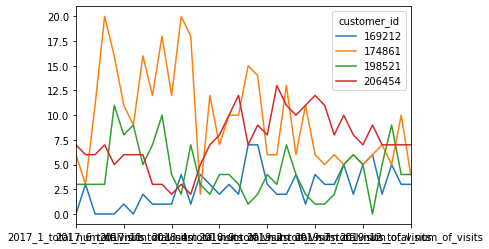

In [0]:
df_sales_summary[matching_total_num_of_visits][0:4].T.plot.line()

In [0]:
list0 = [];
tmp_df = pd.DataFrame()
tmp_df['Num_months'] = (df_sales_summary[matching_total_num_of_visits] > 0).astype(int).sum(axis=1)

for index, row in df_sales_summary[matching_total_num_of_visits].iterrows():
  # print(row.values)
  x = row.values
  list0.append(np.trim_zeros(x, 'fb').shape[0])

tmp_df['range'] = list0
tmp_df['ratio'] = tmp_df.Num_months / tmp_df['range']

In [0]:
tmp_df_sort = tmp_df.sort_values('ratio', ascending=False)

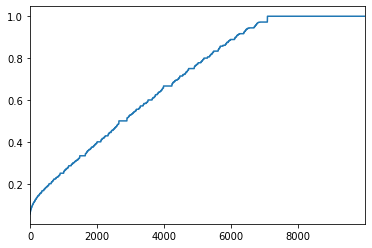

In [0]:
tmp_df_sort['ratio'].sort_values().plot(use_index=False)

In [0]:
selected_customer_id	= tmp_df_sort.iloc[:4500].T.columns

In [0]:
# /content/drive/My Drive/Colab Notebooks/datastorm/processed/df_sales_summary_target_added.csv
customer_data_target_added = pd.read_csv('drive/My Drive/Colab Notebooks/datastorm/processed/df_sales_summary_target_added.csv', index_col=1)

In [0]:
noise_rm_customer_data_target_added = customer_data_target_added.drop(['Unnamed: 0'], axis=1).T[selected_customer_id].T
noise_rm_customer_data_target_added.head()

,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,charned
customer_id,,,,,,,,
661366,2018,5,16432.6,1,16432.6,1,2018/05/31,1
868735,2017,8,100,0,3142,1,2017/08/31,1
303593,2017,1,16659.4,3,19727.8,6,2017/01/31,0
303593,2017,2,985,1,8477.5,2,2017/02/28,0
303593,2017,3,7567.29,3,7567.29,3,2017/03/31,0


In [0]:
noise_rm_customer_data_target_added.shape

(82159, 8)

In [0]:
noise_rm_customer_data_target_added.to_csv('drive/My Drive/Colab Notebooks/datastorm/processed/noise_rm_df_sales_summary_target_added.csv')

In [0]:
test = pd.read_csv('drive/My Drive/Colab Notebooks/datastorm/processed/noise_rm_df_sales_summary_target_added.csv', index_col=0)

In [0]:
test.head()

,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,charned
customer_id,,,,,,,,
661366,2018,5,16432.63,1,16432.63,1,2018/05/31,1
868735,2017,8,100.00,0,3142.00,1,2017/08/31,1
303593,2017,1,16659.37,3,19727.83,6,2017/01/31,0
303593,2017,2,985.00,1,8477.50,2,2017/02/28,0
303593,2017,3,7567.29,3,7567.29,3,2017/03/31,0


In [0]:
filter_1 = test[test.year	 == 2019 ]
filter_2 = filter_1[filter_1.month == 12]
filter_2.head()

,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,charned
customer_id,,,,,,,,
303593,2019,12,18491.29,2,50655.85,9,2019/12/31,1
1240910,2019,12,4867.63,3,9757.45,8,2019/12/31,1
1235467,2019,12,272.16,1,1449.50,4,2019/12/31,1
644082,2019,12,3370.00,2,18143.50,9,2019/12/31,1
461289,2019,12,10669.99,6,16424.59,8,2019/12/31,1


In [0]:
pre_df = filter_2
pre_df.shape

(2770, 8)

In [0]:
filter_3 = test[test.year	 != 2019 ]
filter_4 = filter_3[filter_3.month != 12]
filter_4.shape

(45785, 8)

In [0]:
# new_df = pd.DataFrame(columns=["customer_id", "year", "month", "target"])

In [0]:
# non_index_df = df_sales_summary[matching_total_num_of_visits]

In [0]:
# non_index_df = non_index_df.reset_index

In [0]:
# non_index_df.head()

In [0]:
# non_index_df = non_index_df.rename(columns={x:y for x,y in zip(non_index_df.columns,range(0,len(non_index_df.columns)))})

In [0]:
# for index, row in non_index_df.iterrows():
#   # print(index)
#   for j in range(0,35):
#   # for j, col in row.iteritems():
#     # if(j == 35):
#     #   break
#     # print(j, row)
#     month = j % 12 +1
#     if(j<=12):
#       year = 2017
#     elif(j<=24):
#       year = 2018
#     else:
#       year = 2019
#     target = 1
#     if( (row[j] +  row[j+1]) != 0 ):
#       target = 0
#     print(j,year, month, target, row[j], row[j+1])
#     new_df = new_df.append({'customer_id' :index , 'year' : year , 'month' : month , 'target' : target} , ignore_index=True)
#     # new_df